In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.manifold import TSNE

In [2]:
df=pd.read_csv("crypto_data.csv")
df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [3]:
df.dtypes

Unnamed: 0          object
CoinName            object
Algorithm           object
IsTrading             bool
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [4]:
# discard all crypto currencied that are not being traded and  drop the 'IsTrading' column from the dataframe.
df['IsTrading'].value_counts()

True     1144
False     108
Name: IsTrading, dtype: int64

In [5]:
df=df.loc[df['IsTrading']== True,:]

In [6]:
df['IsTrading'].value_counts()

True    1144
Name: IsTrading, dtype: int64

In [7]:
df=df.drop(['Unnamed: 0','IsTrading'],axis=1)
df.columns

Index(['CoinName', 'Algorithm', 'ProofType', 'TotalCoinsMined',
       'TotalCoinSupply'],
      dtype='object')

In [8]:
# Remove all rows that have at least one null value.
df.isnull().sum()

CoinName             0
Algorithm            0
ProofType            0
TotalCoinsMined    459
TotalCoinSupply      0
dtype: int64

In [9]:
df=df.dropna(axis=0,how='any')

In [10]:
df.isnull().sum()

CoinName           0
Algorithm          0
ProofType          0
TotalCoinsMined    0
TotalCoinSupply    0
dtype: int64

In [11]:
df.shape

(685, 5)

In [12]:
#Filter for cryptocurrencies that have been mined. That is, the total coins mined should be greater than zero.
df=df.loc[df['TotalCoinsMined']>0,:]

In [13]:
df.shape

(532, 5)

In [14]:
# delete the CoinName from the original dataframe.
df=df.drop('CoinName',axis=1)

In [15]:
df['TotalCoinSupply']=df['TotalCoinSupply'].astype(float)

In [16]:
df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,4.200000e+01
2,Scrypt,PoW/PoS,1.055185e+09,5.320000e+08
5,X13,PoW/PoS,2.927942e+10,3.141593e+11
7,SHA-256,PoW,1.792718e+07,2.100000e+07
8,Ethash,PoW,1.076842e+08,0.000000e+00


In [17]:
df.dtypes

Algorithm           object
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply    float64
dtype: object

In [18]:
df.shape

(532, 4)

In [19]:
#use Pandas to create dummy variables for categorical columns 
df_encoded=pd.get_dummies(df,drop_first=True) 
df_encoded.columns

Index(['TotalCoinsMined', 'TotalCoinSupply', 'Algorithm_536',
       'Algorithm_Argon2d', 'Algorithm_BLAKE256', 'Algorithm_Blake',
       'Algorithm_Blake2S', 'Algorithm_Blake2b', 'Algorithm_C11',
       'Algorithm_Cloverhash', 'Algorithm_Counterparty',
       'Algorithm_CryptoNight', 'Algorithm_CryptoNight Heavy',
       'Algorithm_CryptoNight-V7', 'Algorithm_Cryptonight-GPU',
       'Algorithm_DPoS', 'Algorithm_Dagger', 'Algorithm_Dagger-Hashimoto',
       'Algorithm_ECC 256K1', 'Algorithm_Equihash',
       'Algorithm_Equihash+Scrypt', 'Algorithm_Ethash', 'Algorithm_Exosis',
       'Algorithm_Green Protocol', 'Algorithm_Groestl', 'Algorithm_HMQ1725',
       'Algorithm_HybridScryptHash256', 'Algorithm_IMesh',
       'Algorithm_Jump Consistent Hash', 'Algorithm_Keccak',
       'Algorithm_Leased POS', 'Algorithm_Lyra2RE', 'Algorithm_Lyra2REv2',
       'Algorithm_Lyra2Z', 'Algorithm_M7 POW', 'Algorithm_Multiple',
       'Algorithm_NIST5', 'Algorithm_NeoScrypt', 'Algorithm_Ouroboros',
   

In [20]:
df_encoded.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
df_encoded.shape

(532, 96)

#### Notice: using pandas get_dummies() increase number of columns.

In [22]:
#Standardize your dataset so that columns that contain larger values do not unduly influence the outcome.
df_scaled=MinMaxScaler().fit_transform(df_encoded)

In [23]:
pca=PCA(n_components=0.90)
df_pca=pca.fit_transform(df_scaled)
df_pca.shape


(532, 28)

In [24]:
tsne=TSNE (learning_rate=150)
tsne_featues=tsne.fit_transform(df_pca)
tsne_featues.shape

(532, 2)

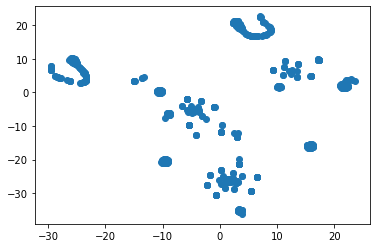

In [25]:
plt.scatter(tsne_featues[:,0],tsne_featues[:,1])
plt.show()

#### 5 clusters can be noticed in TSNE features plot

In [26]:
inertia=[]
k=np.arange(1,11,1)

for i in k:
    km=KMeans(n_clusters=i)
    km.fit(tsne_featues)
    inertia.append(km.inertia_)
    

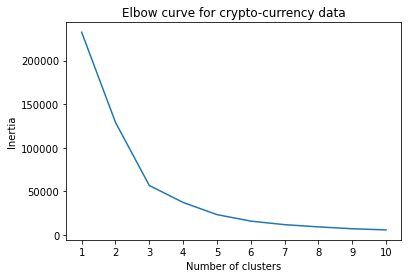

In [27]:
plt.plot(k, inertia)
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for crypto-currency data')
plt.show()

#### elbow of the curve is near 3, so these dataset can be classified in 3 clusters.

In [28]:
km=KMeans(n_clusters=3)
km.fit(tsne_featues)
labels=km.labels_


#### Plotting TSNE features with labeled data

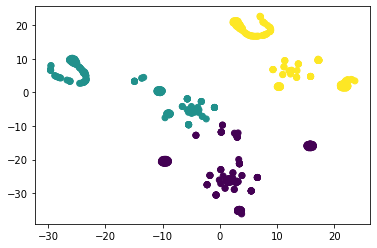

In [29]:
plt.scatter(tsne_featues[:,0],tsne_featues[:,1],c= labels)
plt.show()

#### Inertia slows down near K value 3. So based on this model cryptocurrencies can be clustered in  3 groups.

#### Trying to plot dendrogram to check no of possible clusters

In [30]:
from scipy.cluster.hierarchy import dendrogram, linkage


In [31]:
# Perform hierarchical clustering
mergings = linkage(df_pca, method='ward')

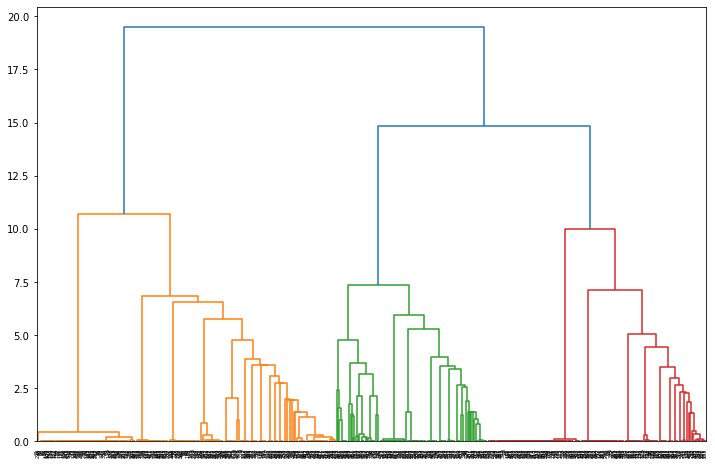

In [32]:
# Generate a dendrogram
plt.figure(figsize=(12,8))

dendrogram(mergings,
          leaf_rotation=90,
          leaf_font_size=5)

plt.show()

#### From dendrogram plot, it is also noticed that this dataset can be classified in 3 main clusters.